# Final Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [6]:
data = pd.read_csv("/Users/brianchoi/Documents/Data_Science/Projects/NBA_Draft_Prediction/Data/collegeplayer_cleaned2.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

# Selecting predictor variables based on EDA

sel_col = ['Rec Rank', 'dbpm', 'obpm', 'bpm', 'stops', 'dporpag', 'porpag', 'ftr', 
'stl_per', 'twoPM', 'FTA', 'FTM', 'ORB_per', 'yr', 'AFFILIATION', 'conf', 'Class']

df = data.loc[:, sel_col].copy()

# Encoding categorical variables
df_dummies = pd.get_dummies(df.loc[:, ['yr', 'AFFILIATION', 'conf']])
df.drop(columns=['yr', 'AFFILIATION', 'conf'], inplace=True)

# Merging dummies and numeric variables
final_df = pd.concat([df, df_dummies], axis=1)

final_df

,Rec Rank,dbpm,obpm,bpm,stops,dporpag,porpag,ftr,stl_per,twoPM,...,conf_P12,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC
0,100.0,3.089750,3.19980,6.28955,207.722,4.47388,4.33352,38.9,2.5,114,...,0,0,0,0,0,0,0,0,0,0
1,99.6,7.466380,5.53482,13.00120,256.359,5.00113,5.41065,56.6,1.4,185,...,1,0,0,0,0,0,0,0,0,0
2,99.0,3.325160,4.94571,8.27087,119.770,3.00240,2.97007,33.8,3.4,87,...,0,0,0,0,0,0,0,0,0,0
3,98.2,4.473150,4.85317,9.32632,209.261,4.13889,3.79887,37.1,3.5,119,...,0,0,0,0,0,0,0,0,0,1
4,90.2,3.225720,2.63123,5.85695,171.133,4.12090,2.56112,21.6,2.4,72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,NaN,0.258865,4.90741,5.16627,143.825,3.43490,4.66241,25.7,3.9,87,...,0,0,0,0,0,0,0,0,0,1
1483,73.8,2.372230,3.18525,5.55748,261.974,4.40826,5.71878,77.0,1.3,205,...,0,0,0,0,0,0,0,0,0,0
1484,NaN,1.187370,7.93000,9.11737,247.094,3.56984,6.26497,24.7,3.3,197,...,0,0,0,0,0,0,0,0,0,0
1485,NaN,2.798950,2.36602,5.16497,165.533,2.83551,2.70618,59.5,0.8,126,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier

In [8]:
# Creating a function to check model performances

def check_scores(dct, model_type, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    cv_score_train = cross_val_score(model, X_train, y_train, cv=5)
    err_train = mean_squared_error(y_train, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred)
    precision_train = precision_score(y_train, y_pred)

    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

    print("For Training Sets:   ")
    print('Cross Validation Score: {}'.format(np.mean(cv_score_train)))
    print('MSE Score: {}'.format(err_train))
    print('Accuracy: {}'.format(accuracy_train))
    print('Precision: {}'.format(precision_train))

    print('---------------------------------------------------------')

    cv_score_test = cross_val_score(model, X_test, y_test, cv=5)
    err_test = mean_squared_error(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)

    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print("For Test Sets:  ")
    print('Cross Validation Score: {}'.format(np.mean(cv_score_test)))
    print('MSE Score: {}'.format(err_test))
    print('Accuracy: {}'.format(accuracy_test))
    print('Precision: {}'.format(precision_test))

    dct['Model Type'].append(model_type)
    dct['CV Score Training'].append(np.mean(cv_score_train))
    dct['MSE Training'].append(err_train)
    dct['Accuracy Training'].append(accuracy_train)
    dct['Precision Training'].append(precision_train)
    dct['CV Score Test'].append(np.mean(cv_score_test))
    dct['MSE Test'].append(err_test)
    dct['Accuracy Test'].append(accuracy_test)
    dct['Precision Test'].append(precision_test)
    dct['Model'].append(model)

In [9]:
models_dct = {'Model Type': [], 'CV Score Training': [], 'MSE Training': [], 'Accuracy Training': [],
    'Precision Training': [], 'CV Score Test': [], 'MSE Test': [], 'Accuracy Test': [],
    'Precision Test': [], 'Model': []}

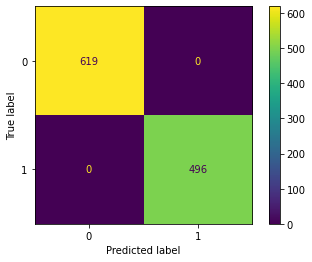

For Training Sets:   
Cross Validation Score: 0.7174887892376682
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


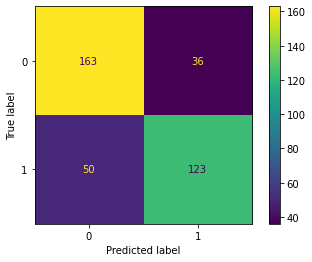

For Test Sets:  
Cross Validation Score: 0.7095495495495496
MSE Score: 0.23118279569892472
Accuracy: 0.7688172043010753
Precision: 0.7735849056603774


In [11]:
# Features
X = final_df.drop(columns='Class', axis=1)
# Target
y = final_df['Class']

# Split the data into training and testing sets (test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Filling missing data
si = SimpleImputer(strategy='median')
X_train_imputed = si.fit_transform(X_train)
X_test_imputed = si.transform(X_test)

# Gradient Boosting Classifier Boosted Model
ada_gbc = AdaBoostClassifier(base_estimator=GradientBoostingClassifier())
ada_gbc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_gbc', ada_gbc, X_train_imputed, y_train, X_test_imputed, y_test)

In [13]:
pd.DataFrame(models_dct)

,Model Type,CV Score Training,MSE Training,Accuracy Training,Precision Training,CV Score Test,MSE Test,Accuracy Test,Precision Test,Model
0,ada_gbc,0.717489,0.0,1.0,1.0,0.70955,0.231183,0.768817,0.773585,(([DecisionTreeRegressor(criterion='friedman_m...
